In [34]:
import datetime as dt
import pandas as pd
import pandas_datareader.data as web
import numpy as np
from scipy import stats
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
start = dt.date(2013,1,1)
end = dt.date(2016,12,31)

In [3]:
df = web.DataReader("IBM","yahoo",start,end)

In [4]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-12-31,191.679993,188.839996,189.229996,191.550003,4684900.0,142.497650
2013-01-02,196.350006,193.800003,194.089996,196.350006,4234100.0,146.068481
2013-01-03,196.289993,194.440002,195.669998,195.270004,3644700.0,145.265015
2013-01-04,194.460007,192.779999,194.190002,193.990005,3380200.0,144.312820
2013-01-07,193.779999,192.339996,193.399994,193.139999,2862300.0,143.680496
...,...,...,...,...,...,...
2016-12-23,167.490005,166.449997,167.000000,166.710007,1701200.0,141.231049
2016-12-27,167.979996,166.850006,166.979996,167.139999,1397500.0,141.595306
2016-12-28,167.740005,166.000000,167.289993,166.190002,1757500.0,140.790512


In [21]:
rt = np.diff(np.log(df["Close"]))
#rt = np.append(np.nan,rt)
#pd.DataFrame(rt)
rt

array([ 0.02474993, -0.00551557, -0.0065766 , ..., -0.00570005,
        0.00246404, -0.00366819])

In [23]:
stats.ttest_1samp(rt,0)

Ttest_1sampResult(statistic=-0.36924893070622355, pvalue=0.7120198143260279)

In [25]:
sms.DescrStatsW(rt).tconfint_mean(alpha = 0.05)

(-0.0008971738221539999, 0.0006130045594415028)

In [27]:
##------正态性检验----------##
from scipy.stats import shapiro,kstest,anderson
# shapiro-wilk test
shapiro(rt)
# 输出结果第一个为统计量值，第二个为p值

(0.9264149069786072, 8.305715279986766e-22)

In [28]:
# ks检验
z = (rt-np.mean(rt))/np.std(rt)
kstest(z,cdf = "norm")

KstestResult(statistic=0.0683248980965992, pvalue=0.00015509873885676112)

In [29]:
# anderson-Darling test
anderson(rt, dist = "norm")

AndersonResult(statistic=8.914450598436815, critical_values=array([0.574, 0.653, 0.784, 0.914, 1.088]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [30]:
###########################################################
##
##      Q2:先画QQ图，再决定进行哪一种检验
##
###########################################################

In [32]:
##---读取IBM和MSFT数据---##
start = dt.date(2012,1,1)
end = dt.date(2016,12,31)
IBM_data = web.DataReader("IBM","yahoo",start,end)
MSFT_data = web.DataReader("MSFT","yahoo",start,end)

In [33]:
IBM_log_return = np.diff(np.log(IBM_data["Close"]))
MSFT_log_return = np.diff(np.log(MSFT_data["Close"]))

In [35]:
z1 = (IBM_log_return-IBM_log_return.mean())/IBM_log_return.std()
z2 = (MSFT_log_return-MSFT_log_return.mean())/MSFT_log_return.std()

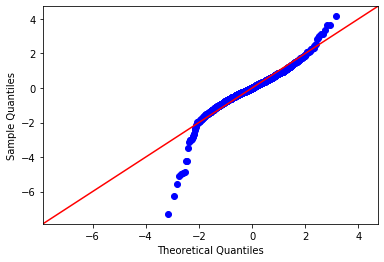

In [36]:
##----QQ图1----##
sm.qqplot(z1,line = '45')
plt.show()

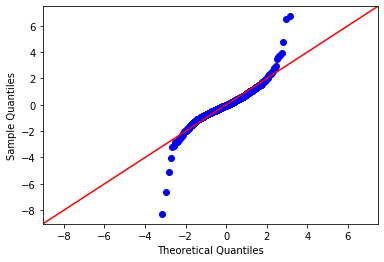

In [37]:
##----QQ图2----##
sm.qqplot(z2,line = '45')
plt.show()

In [38]:
#-----Two-sample Wilcoxon test. 
from scipy.stats import ranksums
ranksums(IBM_log_return,MSFT_log_return)

RanksumsResult(statistic=-0.703197878213132, pvalue=0.4819324413453949)